# Data Playground

- Mt CO2/yr = Millions of tonnes of CO2 per year.
- LULUCF = Land use, land-use change, and forestry.
- GDP = Gross Domestic Product

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

**Questions**

- Do we have access to the corresponding data for GDP and Population, and if so would we be able to reduce the amount of sheets we use by including the calculations for these in the first excel sheet?

- How are we addressing NaN missing fields? Some I imagine are relevant as they represent 0 CO2 emissions where as others are simply missing data. In such cases we need to decide a best practice to replace the missing values.

- International Aviation appears as a country in several of the sheets, what should we do with this?



## Raw Data / Separated

In [ ]:
CO2_PATH = "data/CO2_data.xlsx"

### Total_by_country

In [4]:
total_by_country = pd.read_excel(CO2_PATH, sheet_name = "fossil_CO2_totals_by_country")
total_by_country.head()

,Substance,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,1976,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,CO2,ABW,Aruba,0.081876,0.081889,0.095415,0.099630,0.089089,0.105139,0.096041,...,1.618441,1.588689,1.615728,1.607879,1.578644,1.315458,1.347594,1.387156,1.144333,1.274134
1,CO2,AFG,Afghanistan,1.739541,1.737823,1.715749,1.742813,2.198551,2.037627,1.899895,...,10.238064,8.484183,8.016290,8.361849,7.635914,8.145255,9.106997,8.082724,8.183718,8.347669
2,CO2,AGO,Angola,8.952570,8.538308,10.388519,11.372301,11.833761,10.930423,7.317385,...,24.186843,27.822325,30.407844,32.594130,30.691660,26.129882,24.048619,25.325994,23.055844,24.450057
3,CO2,AIA,Anguilla,0.002168,0.002168,0.002264,0.002109,0.002350,0.002584,0.002434,...,0.026023,0.027941,0.027896,0.028005,0.028340,0.029062,0.028223,0.027580,0.022779,0.025409
4,CO2,AIR,International Aviation,169.300997,169.300997,179.147487,186.892096,179.793331,173.866020,174.273791,...,472.721119,480.909126,496.627697,524.654035,548.207777,582.230490,609.630469,617.763229,338.144083,390.166250


In [3]:
total_by_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 55 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Substance           212 non-null    object 
 1   EDGAR Country Code  212 non-null    object 
 2   Country             212 non-null    object 
 3   1970                212 non-null    float64
 4   1971                212 non-null    float64
 5   1972                212 non-null    float64
 6   1973                212 non-null    float64
 7   1974                212 non-null    float64
 8   1975                212 non-null    float64
 9   1976                212 non-null    float64
 10  1977                212 non-null    float64
 11  1978                212 non-null    float64
 12  1979                212 non-null    float64
 13  1980                212 non-null    float64
 14  1981                212 non-null    float64
 15  1982                212 non-null    float64
 16  1983    

In [63]:
total_by_country_melt = total_by_country.drop(['Substance', 'EDGAR Country Code'], axis=1).melt(id_vars=["Country"])
total_by_country_melt.head(5)

,Country,variable,value
0,Aruba,1970,0.081876
1,Afghanistan,1970,1.739541
2,Angola,1970,8.952570
3,Anguilla,1970,0.002168
4,International Aviation,1970,169.300997


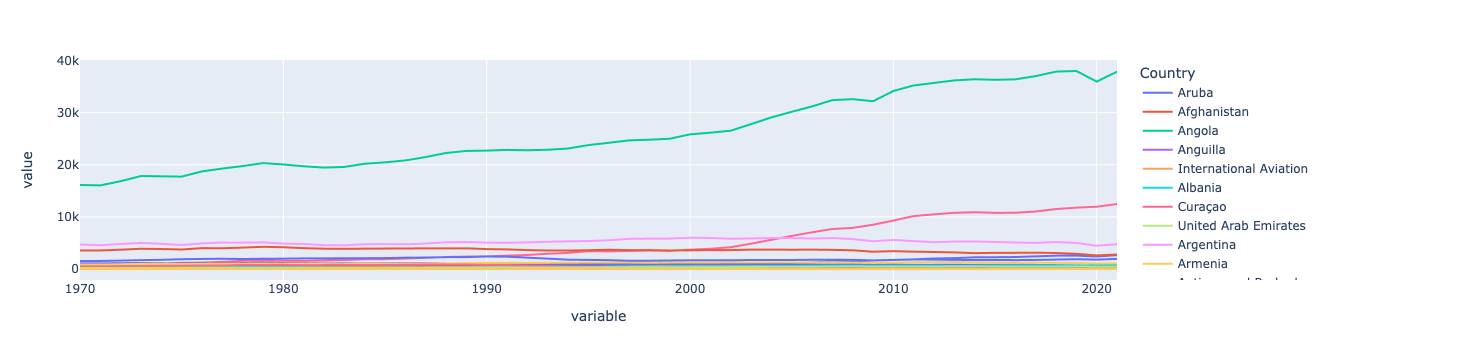

In [64]:
import plotly.express as px

fig = px.line(test, x="variable", y="value", color='Country')
fig.show()

### Sector_and_country

In [5]:
sector_and_country = pd.read_excel(CO2_PATH, sheet_name = "fossil_CO2_by_sector_and_countr")
sector_and_country.head()

,Substance,Sector,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,CO2,Power Industry,ABW,Aruba,0.034724,0.034724,0.034176,0.038519,0.034308,0.042696,...,0.896292,0.846442,0.867821,0.875170,0.865656,0.636500,0.626470,0.644432,0.531847,0.592537
1,CO2,Power Industry,AFG,Afghanistan,0.057193,0.057193,0.117373,0.175702,0.207734,0.211630,...,2.301978,2.141513,2.184922,2.403155,2.381635,2.536319,2.714542,2.412286,2.497878,2.547293
2,CO2,Power Industry,AGO,Angola,0.137584,0.137584,0.159268,0.168796,0.371819,0.352956,...,2.699129,3.993658,5.669711,6.130962,4.198263,4.071509,4.016469,4.612130,4.304458,4.687903
3,CO2,Power Industry,AIA,Anguilla,0.000430,0.000430,0.000436,0.000438,0.000447,0.000480,...,0.000910,0.000978,0.000976,0.000980,0.001018,0.001056,0.001025,0.001033,0.000870,0.000998
4,CO2,Power Industry,ALB,Albania,0.698307,0.698307,0.743388,0.756574,0.763702,0.710119,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
sector_and_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 56 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Substance           1036 non-null   object 
 1   Sector              1036 non-null   object 
 2   EDGAR Country Code  1036 non-null   object 
 3   Country             1036 non-null   object 
 4   1970                1018 non-null   float64
 5   1971                1018 non-null   float64
 6   1972                1018 non-null   float64
 7   1973                1021 non-null   float64
 8   1974                1020 non-null   float64
 9   1975                1021 non-null   float64
 10  1976                1021 non-null   float64
 11  1977                1021 non-null   float64
 12  1978                1022 non-null   float64
 13  1979                1022 non-null   float64
 14  1980                1022 non-null   float64
 15  1981                1021 non-null   float64
 16  1982  

### GDP_by_country

In [7]:
GDP_by_country = pd.read_excel(CO2_PATH, sheet_name = "fossil_CO2_per_GDP_by_country")
GDP_by_country.head()

,Substance,EDGAR Country Code,Country,1990,1991,1992,1993,1994,1995,1996,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,CO2,ABW,Aruba,0.259123,0.283727,0.311033,0.278271,0.281836,0.295495,0.195168,...,0.468715,0.432303,0.439750,0.422637,0.406352,0.321007,0.324734,0.341388,0.362543,0.345605
1,CO2,AFG,Afghanistan,0.095005,0.101843,0.061179,0.078183,0.096176,0.056922,0.058905,...,0.158300,0.124224,0.114260,0.117480,0.104910,0.109022,0.120462,0.102889,0.106683,0.108820
2,CO2,AGO,Angola,0.165580,0.171977,0.187962,0.247615,0.231432,0.226841,0.241661,...,0.119849,0.131361,0.136966,0.145447,0.140584,0.119869,0.111793,0.118561,0.114215,0.120280
3,CO2,AIA,Anguilla,0.024681,0.039792,0.031377,0.038098,0.048945,0.060947,0.062495,...,0.073785,0.092105,0.096760,0.112214,0.125609,0.148555,0.187722,0.122208,0.107731,0.120166
4,CO2,AIR,International Aviation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
GDP_by_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Substance           212 non-null    object 
 1   EDGAR Country Code  212 non-null    object 
 2   Country             212 non-null    object 
 3   1990                200 non-null    float64
 4   1991                200 non-null    float64
 5   1992                200 non-null    float64
 6   1993                200 non-null    float64
 7   1994                200 non-null    float64
 8   1995                200 non-null    float64
 9   1996                200 non-null    float64
 10  1997                200 non-null    float64
 11  1998                200 non-null    float64
 12  1999                200 non-null    float64
 13  2000                200 non-null    float64
 14  2001                200 non-null    float64
 15  2002                200 non-null    float64
 16  2003    

### Capita_by_country

In [9]:
capita_by_country = pd.read_excel(CO2_PATH, sheet_name = "fossil_CO2_per_capita_by_countr")
capita_by_country.head()

,Substance,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,1976,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,CO2,ABW,Aruba,1.386249,1.377678,1.594510,1.653806,1.471866,1.733329,1.585203,...,15.777813,15.396213,15.566530,15.409848,15.060231,12.496750,12.752857,13.079835,10.751174,11.907793
1,CO2,AFG,Afghanistan,0.156348,0.152203,0.146371,0.144899,0.178432,0.161841,0.147963,...,0.333520,0.267372,0.244712,0.247858,0.220335,0.229249,0.250377,0.217225,0.215050,0.214516
2,CO2,AGO,Angola,1.321143,1.232565,1.464238,1.562567,1.583252,1.422773,0.926134,...,0.963765,1.070159,1.129542,1.169955,1.065183,0.877307,0.781454,0.796726,0.702335,0.721368
3,CO2,AIA,Anguilla,0.338637,0.336122,0.348216,0.321684,0.356316,0.389807,0.365537,...,1.841831,1.954019,1.929322,1.916736,1.919526,1.949322,1.875905,1.817582,1.490512,1.693915
4,CO2,AIR,International Aviation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
capita_by_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 55 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Substance           212 non-null    object 
 1   EDGAR Country Code  212 non-null    object 
 2   Country             212 non-null    object 
 3   1970                210 non-null    float64
 4   1971                210 non-null    float64
 5   1972                210 non-null    float64
 6   1973                210 non-null    float64
 7   1974                210 non-null    float64
 8   1975                210 non-null    float64
 9   1976                210 non-null    float64
 10  1977                210 non-null    float64
 11  1978                210 non-null    float64
 12  1979                210 non-null    float64
 13  1980                210 non-null    float64
 14  1981                210 non-null    float64
 15  1982                210 non-null    float64
 16  1983    

### LULUCF

In [11]:
LULUCF = pd.read_excel(CO2_PATH, sheet_name = "LULUCF by macro regions")
LULUCF.head()

,Sector,region,substance,1990,1991,1992,1993,1994,1995,1996,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Net,Africa,CO2,-1962.244019,-1936.949032,-1825.070048,-1650.283585,-1606.601178,-1501.702794,-1437.773608,...,-366.177342,-413.791337,-461.283133,-461.628062,-405.297168,-629.730504,-553.837084,-563.651725,-605.658593,-483.387286
1,Net,Asia-Pacific Developed,CO2,-70.583202,-51.289557,-47.319159,269.164164,-102.622854,-124.728878,-266.389670,...,795.176862,682.305599,-224.020827,-9.071099,-37.511013,-339.238006,164.977622,67.244905,-8.158112,-283.312383
2,Net,Eastern Asia,CO2,-1380.810338,-1385.627809,-1338.050280,-1391.008063,-1430.345022,-1424.873264,-1468.820512,...,-1484.397846,-1491.710936,-1481.681675,-1564.212614,-1608.668737,-1517.978867,-1528.723839,-1492.198726,-1502.393280,-1508.130184
3,Net,Eurasia,CO2,-848.911102,-767.781722,-796.058196,-1148.623501,-1131.184186,-1132.778387,-1272.212884,...,-1489.276010,-1378.023921,-1489.537606,-1367.077263,-1442.352264,-1346.600106,-1453.892720,-1183.726391,-1282.173681,-1332.466086
4,Net,Europe,CO2,-593.052923,-722.152787,-712.627797,-730.869330,-687.252973,-658.840311,-675.243761,...,-539.488480,-555.119111,-532.067464,-517.069691,-520.037278,-522.246384,-510.085664,-469.458883,-428.374200,-478.171970


In [12]:
LULUCF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sector     67 non-null     object 
 1   region     67 non-null     object 
 2   substance  67 non-null     object 
 3   1990       67 non-null     float64
 4   1991       67 non-null     float64
 5   1992       67 non-null     float64
 6   1993       67 non-null     float64
 7   1994       67 non-null     float64
 8   1995       67 non-null     float64
 9   1996       67 non-null     float64
 10  1997       67 non-null     float64
 11  1998       67 non-null     float64
 12  1999       67 non-null     float64
 13  2000       67 non-null     float64
 14  2001       67 non-null     float64
 15  2002       67 non-null     float64
 16  2003       67 non-null     float64
 17  2004       67 non-null     float64
 18  2005       67 non-null     float64
 19  2006       67 non-null     float64
 20  2007       6